## Hough Circle Detection

In the previous notebook we only worked with line boundaries. This time we are going to work with circular boundaries as well.

* [HoughCircles](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d) - It find the circular boundaries in binary image using the Hough Transform.

In [177]:
# Import libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Image shape: (658, 828, 3)


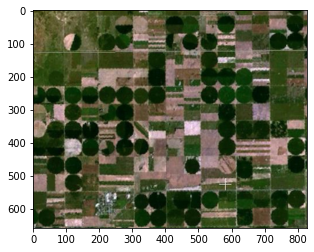

In [178]:
# Read in the image
image: np.ndarray = cv2.imread('images/round_farms.jpg')
image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
gray_image: np.ndarray = cv2.imread(filename='images/round_farms.jpg', flags=cv2.IMREAD_GRAYSCALE)
print(f'Image shape: {image.shape}')
plt.imshow(image);

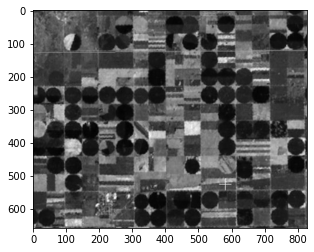

In [179]:
# Gray and blur
gray_blur: np.ndarray = cv2.GaussianBlur(gray_image, (3, 3), 0)
plt.imshow(gray_blur, cmap='gray')

### HoughCircles function

[HoughCircles](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d) takes in a few things as its arguments:
* `image` - A gray scale input image, detection method (Hough gradient), resolution factor between the detection and image (1),
* `method` - OpenCV flags for Hough Transform implemented as [HoughModes](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga073687a5b96ac7a3ab5802eb5510fe65). For circular boundary detection, only used methods right now is `cv2.HOUGH_GRADIENT`. This method computes the gradient on the gray scale image to find edge direction in the edge map.
* `dp` - Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.
* `minDist` - Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighboring circles may be falsely detected in addition to a true ones. If it is too large, some circles may be missed.
* `param1` - First method-specific parameter. In case of HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
* `param2` - Second method-specific parameter. In case of HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
* `minRadius` - Minimum circle radius.
* `maxRadius` - Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, returns centers without finding the radius.

In [180]:
def detect_circles(gray_img: np.ndarray, min_dist: float, 
                    min_radius: int, max_radius: int) -> np.ndarray:
    """Detect circular boundaries using Hough Transform"""
    circles: np.ndarray = cv2.HoughCircles(image=gray_img, method=cv2.HOUGH_GRADIENT,
                                dp=1, 
                                minDist=min_dist,
                                param1=70,
                                param2=11,
                                minRadius=min_radius,
                                maxRadius=max_radius)
    # convert circles into expected type
    circles = np.uint16(np.around(circles))
    return circles
print(f'Circular boundaries shape: {circles.shape}')

Circular boundaries shape: (1, 38, 3)


In [181]:
min_dist: float = 45.
min_radius: int = 20
max_radius: int = 40

## TODO: use HoughCircles to detect circles
# right now there are too many, large circles being detected
# try changing the value of maxRadius, minRadius, and minDist
circles: np.ndarray = detect_circles(
    gray_img=gray_blur, 
    min_dist=min_dist, 
    min_radius=min_radius, 
    max_radius=max_radius)

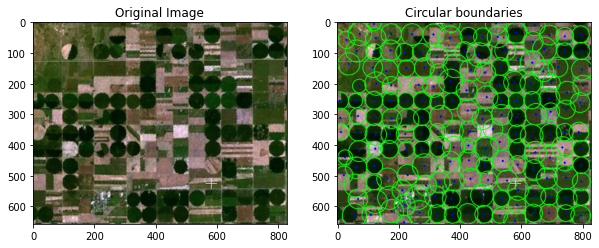

In [182]:
# for drawing circles on
circles_im = np.copy(image)

# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)

_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(circles_im)
ax2.set_title('Circular boundaries');

We can tweak the `minRadius` and `maxRadius` parameters to fine tune the detected boundaries. We need to look at the image above and estimate how many pixels the average circle is in diameter, and use this estimate to provide values for min/max arguments. Another possible area to experiment is the `minDistance` parameter.

In this case we have false detected a lot of circular boundaries. Hence, it makes sense to tweak the parameters and try achieving better detection results.

In [183]:
print(f'Width of the image: {image.shape[1]}')
# There are 16 plots in the y-direction in this image. Each plot may or may not perfectly accommodate a circle
print(f'Approximate circle diameter: {image.shape[1] / 16}')
# We can use the diameter to provide an approximation for the minimum distance between two consecutive 
# circle centers

Width of the image: 828
Approximate circle diameter: 51.75


In [184]:
min_dist: float = image.shape[1] / 16
min_radius: int = int((image.shape[1] / 16) // 2) - 1
max_radius: int = min_radius + 4

circles: np.ndarray = detect_circles(
    gray_img=gray_blur, 
    min_dist=min_dist, 
    min_radius=min_radius, 
    max_radius=max_radius)
print(f'Circular boundaries shape: {circles.shape}')

Circular boundaries shape: (1, 45, 3)


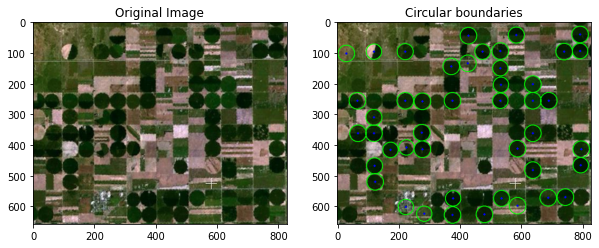

In [185]:
# for drawing circles on
circles_im = np.copy(image)

# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)

_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(circles_im)
ax2.set_title('Circular boundaries');

Above is what we could achieve with some trial and errors with the `minDistance`, `minRadius`, and `maxRadius` parameters.